<a href="https://colab.research.google.com/github/AnshikaaAgarwal/Clustering-On-Dummy-Datasets/blob/main/Image_Segmentation_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

Loading Image

In [22]:

image_path = '/content/imgcheck.jpg'
image = cv2.imread(image_path)
#Since cv2 reads in the form of BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [23]:
image_arr = np.array(image)
print("Shape of Image :", image_arr.shape)
# Reshape the image to a 2D array of pixels (n_pixels, 3)
pixels = image_arr.reshape(-1, 3)
print("RGB value of each pixel :",pixels)
print(pixels.shape)


Shape of Image : (363, 564, 3)
RGB value of each pixel : [[13 14  9]
 [12 13  8]
 [12 13  8]
 ...
 [12 12 10]
 [12 12 10]
 [12 12 10]]
(204732, 3)


Applying K-Means
number of clusters used=5

In [24]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pixels)
centroids = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the more the number of clusters the better it goes


In [25]:
clustered_pixels = centroids[labels]
clustered_img=clustered_pixels.reshape(image.shape)

RGB values of Centroids

In [26]:
print("Cluster centroids (RGB values):")
for i in range(len(centroids)):
    print(f"Centroid {i + 1}: {centroids[i]}")

Cluster centroids (RGB values):
Centroid 1: [153  91  96]
Centroid 2: [21 25 15]
Centroid 3: [120  20  33]
Centroid 4: [198 173 168]
Centroid 5: [49 63 34]


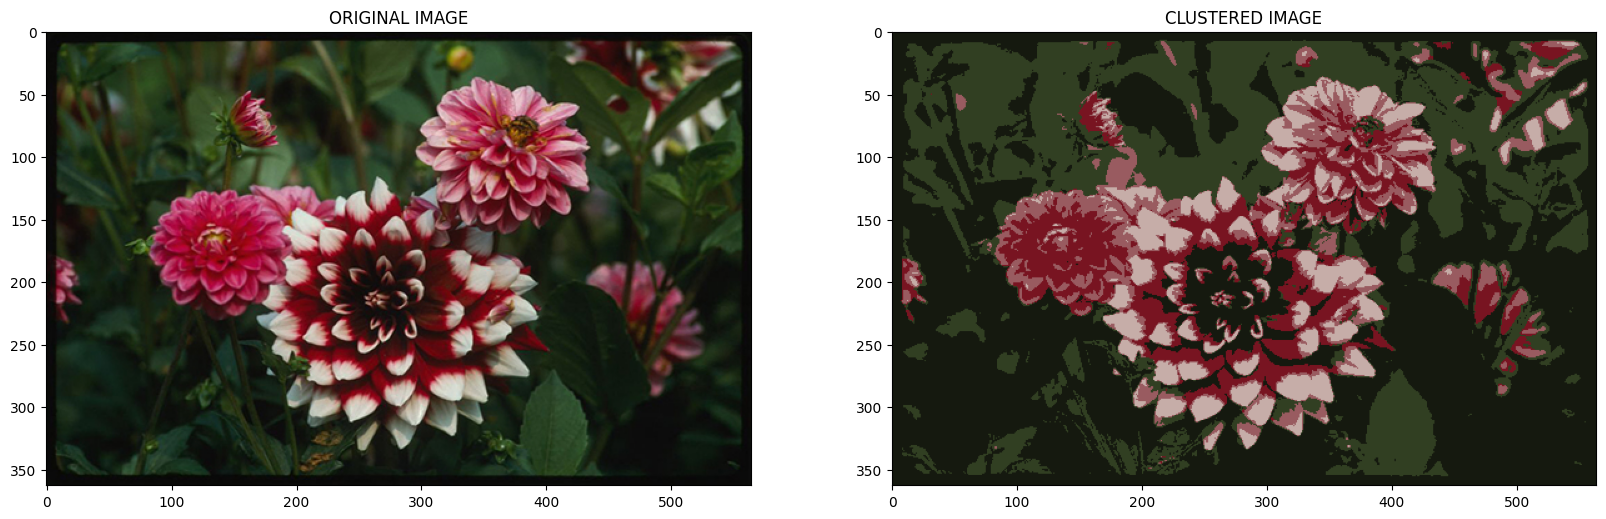

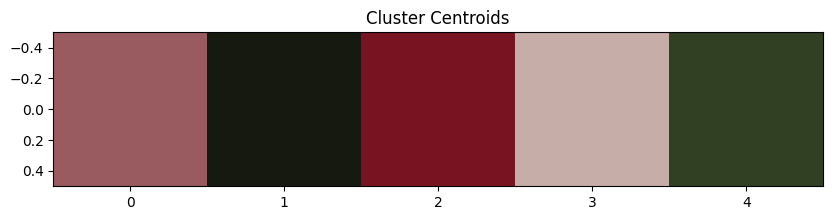

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image)
axs[0].set_title('ORIGINAL IMAGE')

axs[1].imshow(clustered_img)
axs[1].set_title('CLUSTERED IMAGE')


centroid_colors = np.array(centroids, dtype=np.uint8).reshape(1, n_clusters, 3)
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(centroid_colors)
ax.set_title('Cluster Centroids')
plt.show()


In [ ]:
# plot bewtween red & green

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# original image RGB plot

axs[0].scatter(pixels[:, 0], pixels[:, 1], c=pixels / 255.0, marker='.',s=0.5)
axs[0].set_title('RGB Color Distribution - Original Image')


# clustered image RGB plot
axs[1].scatter(clustered_pixels[:, 0], clustered_pixels[:, 1], c=clustered_pixels / 255.0, marker='.',s=250)
axs[1].set_title('RGB Color Distribution - Clustered Image')


plt.show()

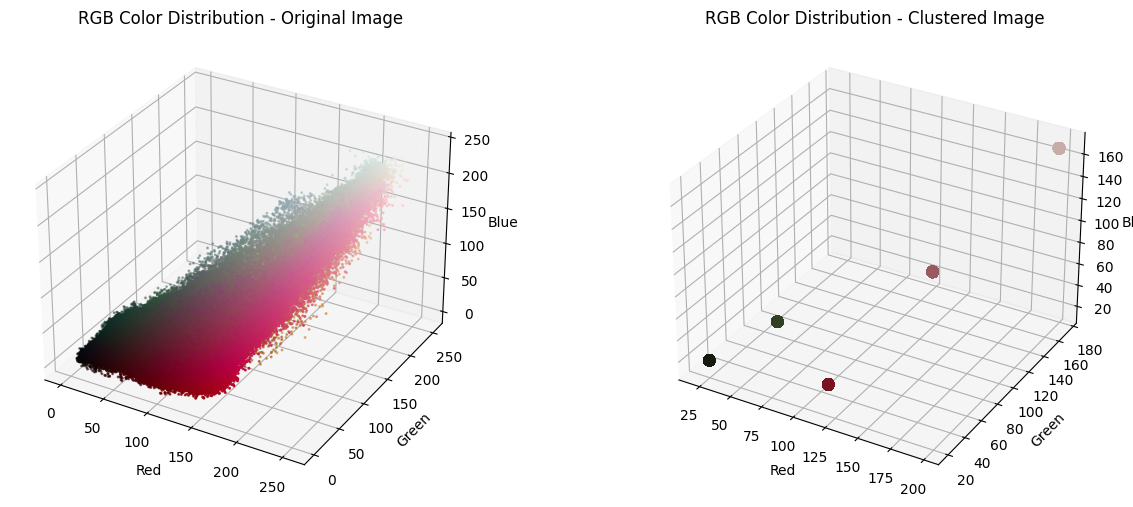

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 6))


ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=pixels / 255.0, marker='.', s=5)
ax1.set_title('RGB Color Distribution - Original Image')
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
ax1.set_zlabel('Blue')


ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(clustered_pixels[:, 0], clustered_pixels[:, 1], clustered_pixels[:, 2], c=clustered_pixels / 255.0, marker='.', s=250)
ax2.set_title('RGB Color Distribution - Clustered Image')
ax2.set_xlabel('Red')
ax2.set_ylabel('Green')
ax2.set_zlabel('Blue')


plt.show()